# Day 08. Exercise 01
# Binary classifier. SVM. Decision tree

## 0. Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

## 1. Preprocessing and logreg visualization

Read the file `am_pm.csv` to a dataframe from the previous exercise.

1. Draw a plot where the x-axis is `am`, the y-axis is `pm`, dots are the days, color depends on the target.
2. Add the decision boundary of logistic regression to the plot.
3. Draw the same plot (with the boundary), but the color should depend this time on the predictions.

Now it should be clear for you how the logistic regression works.

In [2]:
try:
    df = pd.read_csv('../data/am_pm.csv')
except FileNotFoundError as e:
    print("File not found")
    raise e

In [3]:
# Подготовка данных
X = df[['am', 'pm']].values
y = df['target'].values
y_binary = (y == 'weekend').astype(int)

# Обучаем логистическую регрессию
model_logreg = LogisticRegression(random_state=21, fit_intercept=False)
model_logreg.fit(X, y_binary)

LogisticRegression(fit_intercept=False, random_state=21)

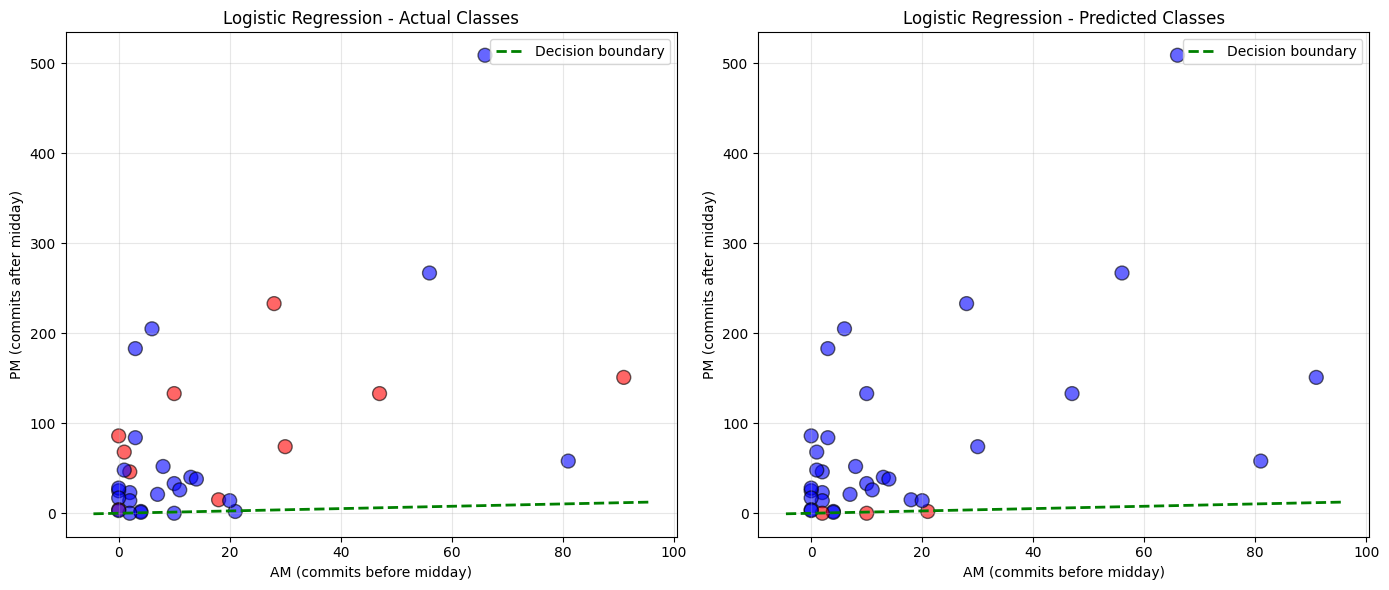

In [4]:
# Реальные классы с границей решений
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Левый график - реальные классы
colors_real = ['red' if y == 1 else 'blue' for y in y_binary]
ax1.scatter(X[:, 0], X[:, 1], c=colors_real, alpha=0.6, edgecolors='black', s=100)

# Добавляем границу решений для регрессии
w1, w2 = model_logreg.coef_[0]
if abs(w2) > 0.0001:
    x_min, x_max = ax1.get_xlim()
    x_values = [x_min, x_max]
    y_values = [-(w1 * x) / w2 for x in x_values]  # b=0 так как fit_intercept=False
    ax1.plot(x_values, y_values, 'g--', linewidth=2, label='Decision boundary')

ax1.set_xlabel('AM (commits before midday)')
ax1.set_ylabel('PM (commits after midday)')
ax1.set_title('Logistic Regression - Actual Classes')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Правый график - предсказанные классы
predictions = model_logreg.predict(X)
colors_pred = ['red' if p == 1 else 'blue' for p in predictions]
ax2.scatter(X[:, 0], X[:, 1], c=colors_pred, alpha=0.6, edgecolors='black', s=100)

# Та же граница решений
if abs(w2) > 0.0001:
    x_min, x_max = ax2.get_xlim()
    x_values = [x_min, x_max]
    y_values = [-(w1 * x) / w2 for x in x_values]
    ax2.plot(x_values, y_values, 'g--', linewidth=2, label='Decision boundary')

ax2.set_xlabel('AM (commits before midday)')
ax2.set_ylabel('PM (commits after midday)')
ax2.set_title('Logistic Regression - Predicted Classes')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Linear models can be sensitive to the scale of your variables. You make it easier for them to find the optimal solution when you scale your features.

1. Apply `StandardScaler` to `X` and train logistic regression again with the same parameters.
2. Calculate `accuracy` for the new model. Did it get better than a naive classifier with the most popular class?
3. Draw the plots that were described above but for the new model.

In [5]:
# Стандартизация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Обучаем логистическую регрессию на стандартизованных данных
model_logreg_scaled = LogisticRegression(random_state=21, fit_intercept=False)
model_logreg_scaled.fit(X_scaled, y_binary)

LogisticRegression(fit_intercept=False, random_state=21)

In [6]:
# Предсказания и accuracy
predictions_scaled = model_logreg_scaled.predict(X_scaled)
predictions_scaled_labels = ['weekend' if p == 1 else 'working_day' for p in predictions_scaled]
accuracy_scaled = accuracy_score(df['target'], predictions_scaled_labels)

# Наивный классификатор
most_popular_class = df['target'].value_counts().index[0]
naive_predictions = [most_popular_class] * len(df)
accuracy_naive = accuracy_score(df['target'], naive_predictions)

print("Результаты со стандартизацией:")
print(f"Accuracy модели со стандартизацией(масшабирование): {accuracy_scaled}")
print(f"Accuracy наивного классификатора: {accuracy_naive:.4f}")
print(f"Модель лучше наивного подхода? {'Да' if accuracy_scaled > accuracy_naive else 'Нет'}")

Результаты со стандартизацией:
Accuracy модели со стандартизацией(масшабирование): 0.7428571428571429
Accuracy наивного классификатора: 0.7143
Модель лучше наивного подхода? Да


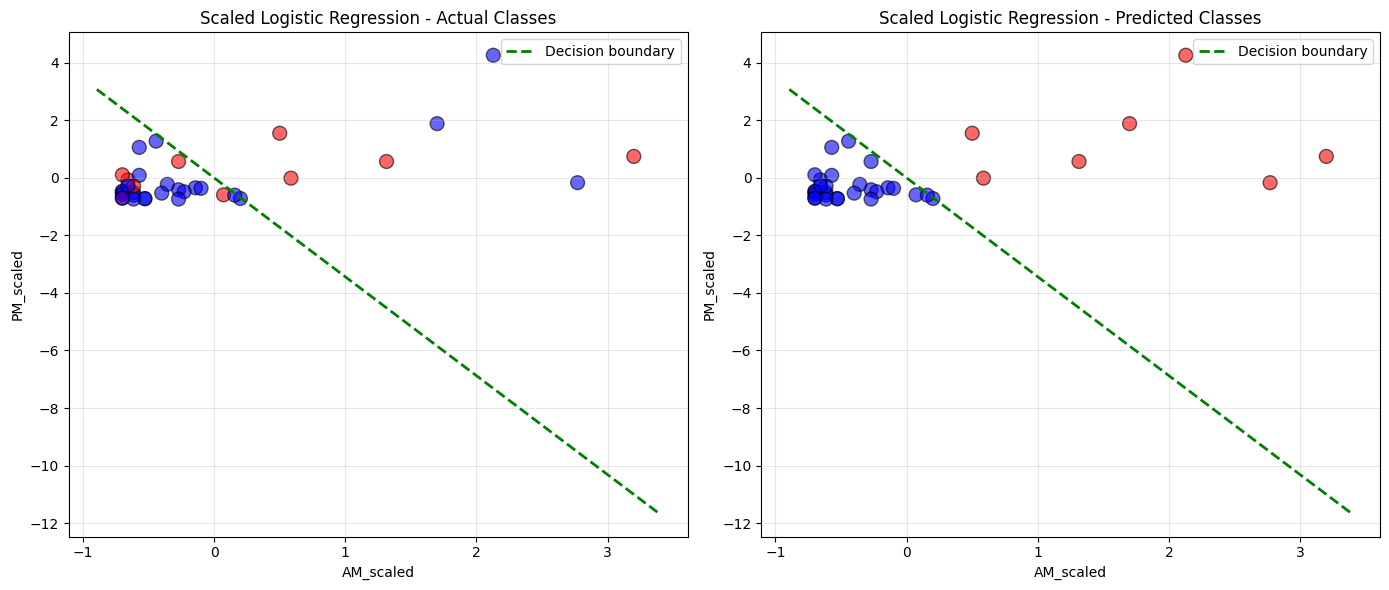

In [7]:
# Визуализация со стандартизованными данными
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Левый график - реальные классы
colors_real = ['red' if y == 1 else 'blue' for y in y_binary]
ax1.scatter(X_scaled[:, 0], X_scaled[:, 1], c=colors_real, alpha=0.6, edgecolors='black', s=100)

# Граница решений для стандартизованной модели
w1_scaled, w2_scaled = model_logreg_scaled.coef_[0]
if abs(w2_scaled) > 0.0001:
    x_min, x_max = ax1.get_xlim()
    x_values = [x_min, x_max]
    y_values = [-(w1_scaled * x) / w2_scaled for x in x_values]
    ax1.plot(x_values, y_values, 'g--', linewidth=2, label='Decision boundary')

ax1.set_xlabel('AM_scaled')
ax1.set_ylabel('PM_scaled')
ax1.set_title('Scaled Logistic Regression - Actual Classes')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Правый график - предсказанные классы
predictions_scaled_binary = model_logreg_scaled.predict(X_scaled)
colors_pred = ['red' if p == 1 else 'blue' for p in predictions_scaled_binary]
ax2.scatter(X_scaled[:, 0], X_scaled[:, 1], c=colors_pred, alpha=0.6, edgecolors='black', s=100)

# Та же граница решений
if abs(w2_scaled) > 0.0001:
    x_min, x_max = ax2.get_xlim()
    x_values = [x_min, x_max]
    y_values = [-(w1_scaled * x) / w2_scaled for x in x_values]
    ax2.plot(x_values, y_values, 'g--', linewidth=2, label='Decision boundary')

ax2.set_xlabel('AM_scaled')
ax2.set_ylabel('PM_scaled')
ax2.set_title('Scaled Logistic Regression - Predicted Classes')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 3. SVM

1. Apply `SVC` model to the scaled dataframe using parameters `probability=True`, `random_state=21`.
2. Calculate `accuracy`.
3. Try different kernels, find the best in terms of accuracy.
4. Draw both plots again with the decisions boundary to see how this algorithm works.

In [8]:
# SVM с разными ядрами
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
svm_results = {}

print("Результаты SVM с разными ядрами:")
for kernel in kernels:
    svm_model = SVC(kernel=kernel, probability=True, random_state=21)
    svm_model.fit(X_scaled, y_binary)
    predictions = svm_model.predict(X_scaled)
    predictions_labels = ['weekend' if p == 1 else 'working_day' for p in predictions]
    accuracy = accuracy_score(df['target'], predictions_labels)
    svm_results[kernel] = (svm_model, accuracy)
    print(f"Kernel '{kernel}': accuracy = {accuracy:.4f}")

Результаты SVM с разными ядрами:
Kernel 'linear': accuracy = 0.7143
Kernel 'poly': accuracy = 0.7429
Kernel 'rbf': accuracy = 0.7429
Kernel 'sigmoid': accuracy = 0.6857


In [9]:
# Находим лучшее ядро
best_kernel = max(svm_results.keys(), key=lambda k: svm_results[k][1])
best_svm_model = svm_results[best_kernel][0]
print(f"\nЛучшее точность svc с ядром: '{best_kernel}', точность = {svm_results[best_kernel][1]}")


Лучшее точность svc с ядром: 'poly', точность = 0.7428571428571429


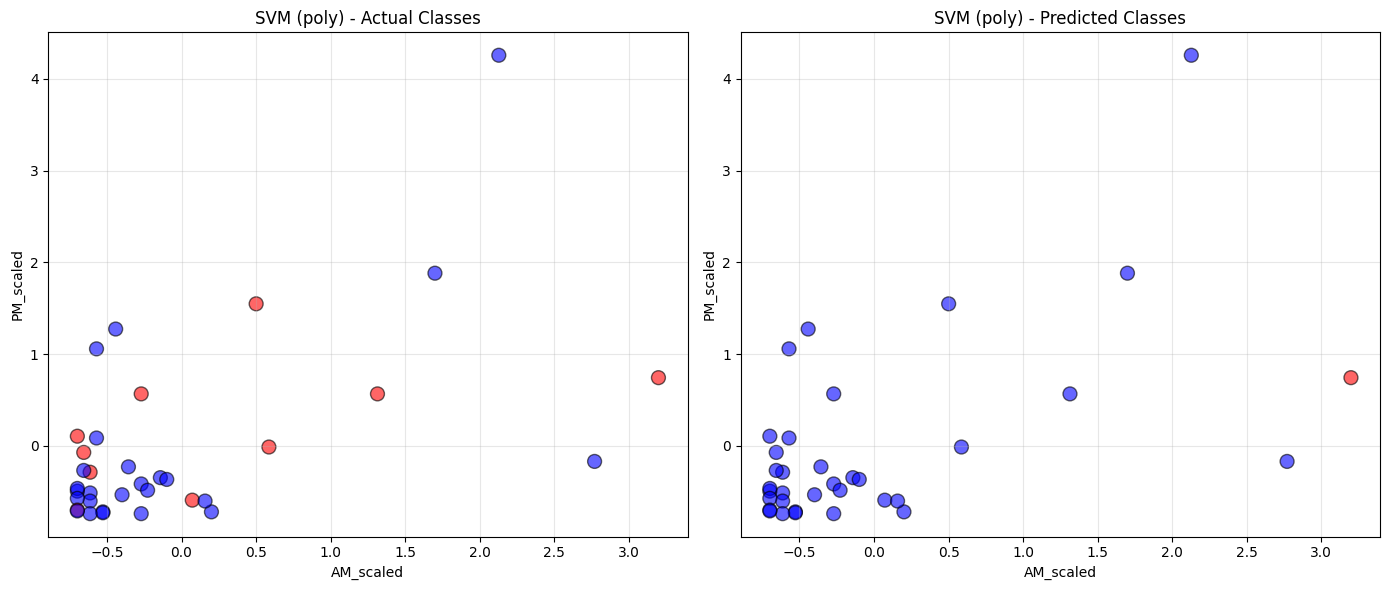

In [10]:
# Визуализация для лучшей SVM модели
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Левый график - реальные классы
colors_real = ['red' if y == 1 else 'blue' for y in y_binary]
ax1.scatter(X_scaled[:, 0], X_scaled[:, 1], c=colors_real, alpha=0.6, edgecolors='black', s=100)
ax1.set_xlabel('AM_scaled')
ax1.set_ylabel('PM_scaled')
ax1.set_title(f'SVM ({best_kernel}) - Actual Classes')
ax1.grid(True, alpha=0.3)

# Правый график - предсказанные классы
predictions_svm = best_svm_model.predict(X_scaled)
colors_pred = ['red' if p == 1 else 'blue' for p in predictions_svm]
ax2.scatter(X_scaled[:, 0], X_scaled[:, 1], c=colors_pred, alpha=0.6, edgecolors='black', s=100)
ax2.set_xlabel('AM_scaled')
ax2.set_ylabel('PM_scaled')
ax2.set_title(f'SVM ({best_kernel}) - Predicted Classes')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 4. Decision tree

1. Apply `DecisionTreeClassifier` to the scaled dataframe using parameters `max_depth=4`, `random_state=42`.
2. Calculate accuracy.
3. Try different values of `max_depth`.
4. Draw both plots again with the decisions boundary to see how this algorithm works.
5. Using method `.plot_tree()` visualize the decision tree itself. It is another way of thinking about how the algorithm works.
6. How many leaves in the visualized tree label days as working days? Put your answer in the markdown cell in the end of the section.

In [11]:
# Decision Tree с max_depth=4
dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_model.fit(X_scaled, y_binary)

predictions_dt = dt_model.predict(X_scaled)
predictions_dt_labels = ['weekend' if p == 1 else 'working_day' for p in predictions_dt]
accuracy_dt = accuracy_score(df['target'], predictions_dt_labels)

print(f"Decision Tree (max_depth=4) accuracy: {accuracy_dt}")

Decision Tree (max_depth=4) accuracy: 0.9428571428571428


In [12]:
# Пробуем разные значения max_depth
print("Результаты с разными max_depth:")
depth_results = {}
for depth in range(1, 5):
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_scaled, y_binary)
    pred = dt.predict(X_scaled)
    pred_labels = ['weekend' if p == 1 else 'working_day' for p in pred]
    acc = accuracy_score(df['target'], pred_labels)
    depth_results[depth] = (dt, acc)
    print(f"max_depth={depth}: accuracy = {acc}")

# Находим лучшую глубину
best_depth = max(depth_results.keys(), key=lambda d: depth_results[d][1])
print(f"\nЛучшая глубина: {best_depth} с accuracy = {depth_results[best_depth][1]:.4f}")

Результаты с разными max_depth:
max_depth=1: accuracy = 0.7714285714285715
max_depth=2: accuracy = 0.8571428571428571
max_depth=3: accuracy = 0.8857142857142857
max_depth=4: accuracy = 0.9428571428571428

Лучшая глубина: 4 с accuracy = 0.9429


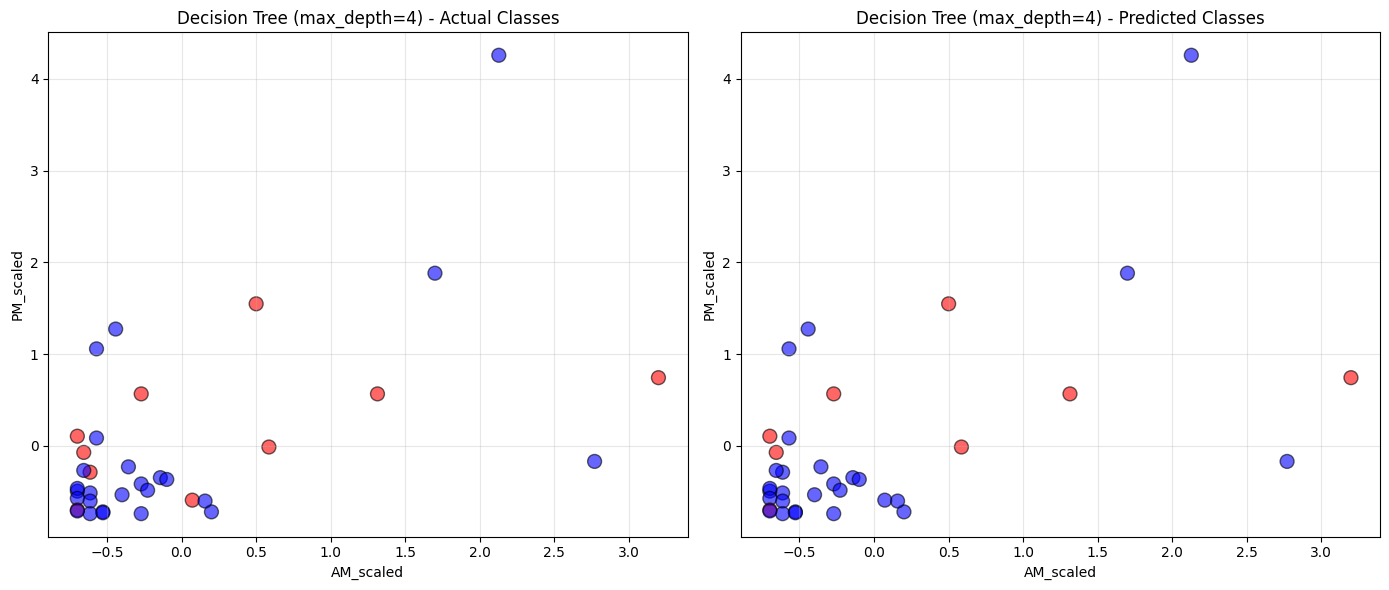

In [13]:
# Визуализация границ решений для дерева с max_depth=4
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Левый график - реальные классы
colors_real = ['red' if y == 1 else 'blue' for y in y_binary]
ax1.scatter(X_scaled[:, 0], X_scaled[:, 1], c=colors_real, alpha=0.6, edgecolors='black', s=100)
ax1.set_xlabel('AM_scaled')
ax1.set_ylabel('PM_scaled')
ax1.set_title('Decision Tree (max_depth=4) - Actual Classes')
ax1.grid(True, alpha=0.3)

# Правый график - предсказанные классы
predictions_dt = dt_model.predict(X_scaled)
colors_pred = ['red' if p == 1 else 'blue' for p in predictions_dt]
ax2.scatter(X_scaled[:, 0], X_scaled[:, 1], c=colors_pred, alpha=0.6, edgecolors='black', s=100)
ax2.set_xlabel('AM_scaled')
ax2.set_ylabel('PM_scaled')
ax2.set_title('Decision Tree (max_depth=4) - Predicted Classes')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

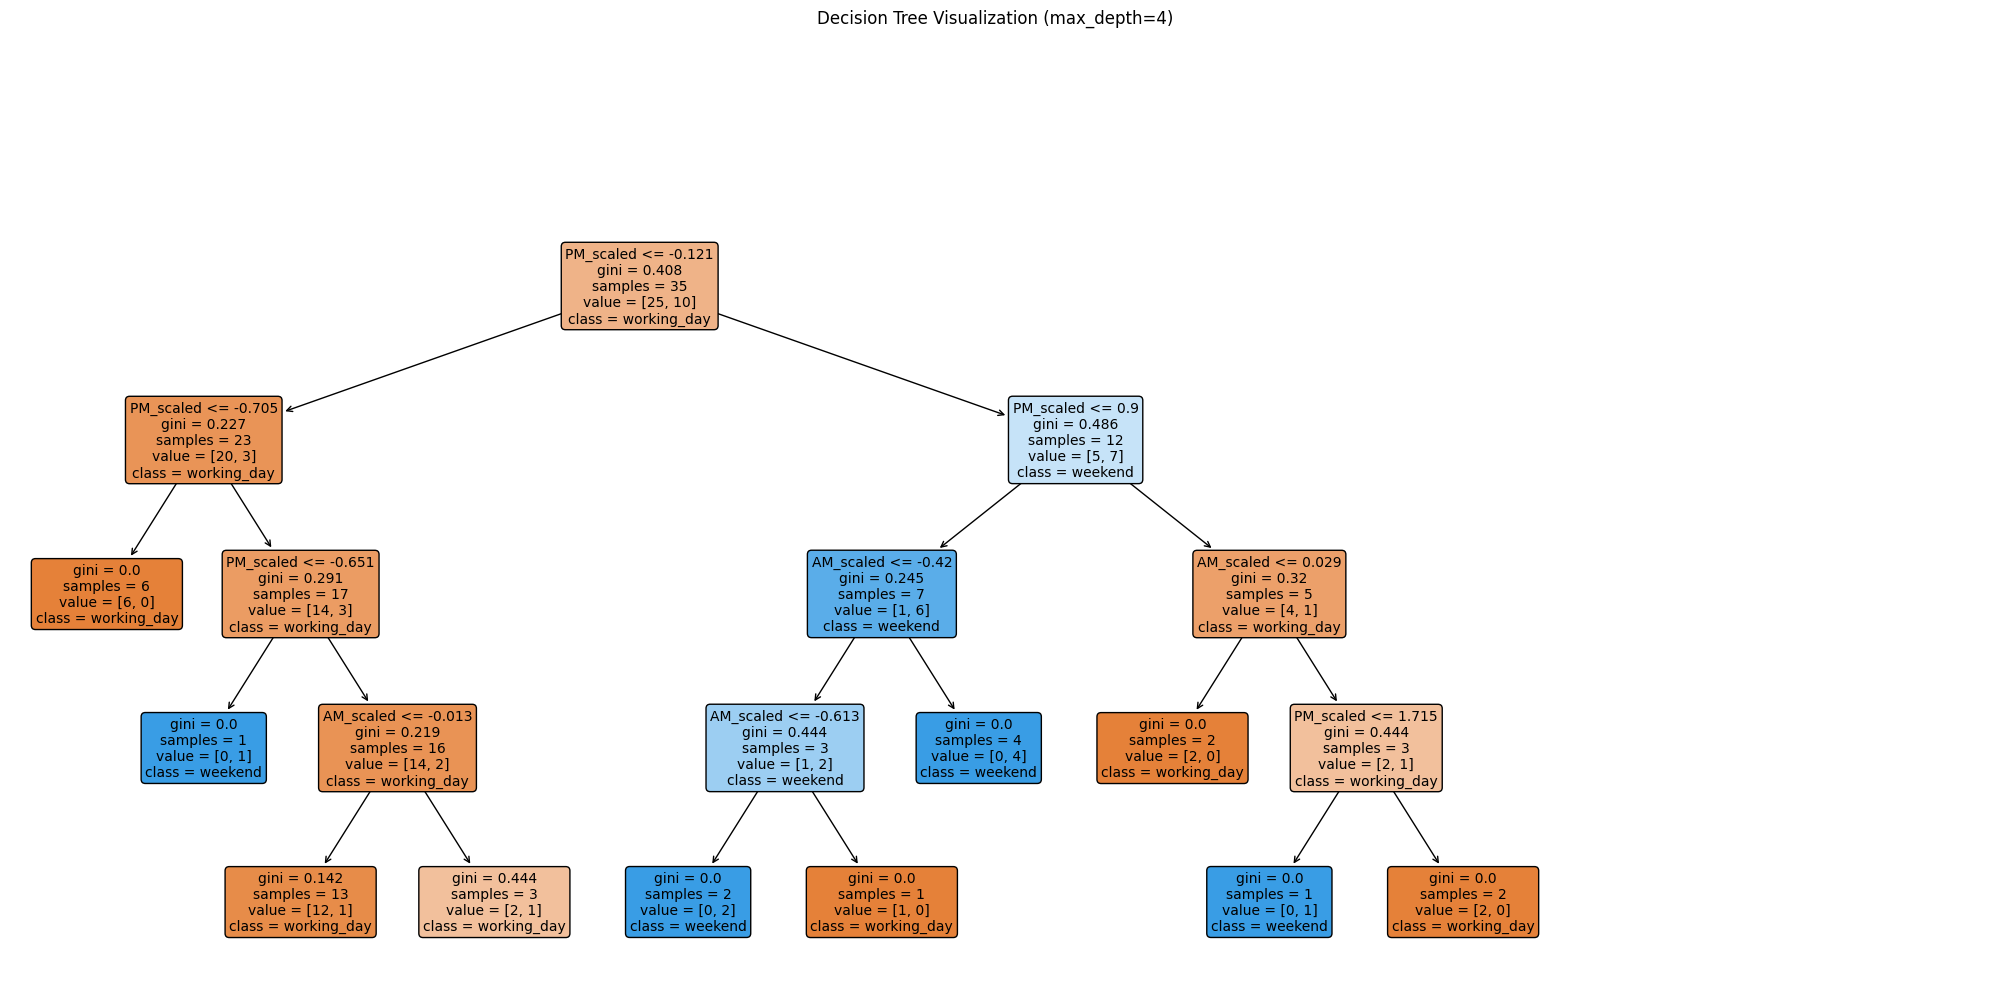

In [14]:
# Визуализация самого дерева решений
plt.figure(figsize=(20, 10))
plot_tree(dt_model,
          feature_names=['AM_scaled', 'PM_scaled'],
          class_names=['working_day', 'weekend'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title('Decision Tree Visualization (max_depth=4)')
plt.tight_layout()
plt.show()

In [15]:
# Сравнение моделей
print(f"Наивный классификатор: {accuracy_naive:.4f}")
print(f"Логистическая регрессия (без стандартизации): {0.6286:.4f}")  # из ex00
print(f"Логистическая регрессия (со стандартизацией): {accuracy_scaled:.4f}")
print(f"SVM ({best_kernel}): {svm_results[best_kernel][1]:.4f}")
print(f"Decision Tree (depth={best_depth}): {depth_results[best_depth][1]:.4f}")

Наивный классификатор: 0.7143
Логистическая регрессия (без стандартизации): 0.6286
Логистическая регрессия (со стандартизацией): 0.7429
SVM (poly): 0.7429
Decision Tree (depth=4): 0.9429


**Question:**How many leaves in the visualized tree label days as working days? </br>**Answer:**4